# Import libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import data

In [62]:
#import data
data_df = pd.read_csv("data/Intern_study.csv")
data_df.head()

,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019


# Adapt data

In [456]:
#small letters and remove spaces
data_df.columns = data_df.columns.str.lower()  
cols = data_df.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
data_df.columns = cols
data_df.head()


,order_id,ready_to_ship_date,pickup_date,ready_to_ship_day,pickup_day,pickup_days_difference,day_of_week
198,CA-2020-164168,2020-11-18,2020-11-20,2,4,2,Friday
91,CA-2019-155187,2019-09-26,2019-09-27,3,4,1,Friday
90,CA-2019-155187,2019-09-26,2019-09-27,3,4,1,Friday
89,CA-2019-134516,2019-09-25,2019-09-27,2,4,2,Friday
192,US-2020-124926,2020-11-18,2020-11-20,2,4,2,Friday


In [379]:
data_df.describe()

,ready_to_ship_day,pickup_day,pickup_days_difference
count,290.000000,290.000000,290.000000
mean,1.410345,2.193103,1.651724
std,1.536374,1.368436,0.940853
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000
50%,1.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000
max,4.000000,4.000000,3.000000


In [383]:
data_df.mode()

,order_id,ready_to_ship_date,pickup_date,ready_to_ship_day,pickup_day,pickup_days_difference
0,CA-2019-100244,2019-09-09,2020-11-12,0.0,2.0,2.0
1,CA-2019-106950,2020-11-09,NaT,NaN,NaN,NaN
2,CA-2020-102925,2020-11-16,NaT,NaN,NaN,NaN
3,CA-2020-164168,2020-11-23,NaT,NaN,NaN,NaN


In [64]:
#drop duplicates
data_df["order_id"].drop_duplicates(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            290 non-null    object
 1   ready_to_ship_date  290 non-null    object
 2   pickup_date         290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [65]:
#drop null
data_df.dropna(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            290 non-null    object
 1   ready_to_ship_date  290 non-null    object
 2   pickup_date         290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [207]:
#change date time format
data_df['ready_to_ship_date'] = pd.to_datetime(data_df['ready_to_ship_date'], format='%d/%m/%Y')
data_df['pickup_date'] = pd.to_datetime(data_df['pickup_date'], format='%d/%m/%Y')

In [206]:
#which day of the week it is
data_df["ready_to_ship_day"] = data_df["ready_to_ship_date"].dt.dayofweek
data_df["pickup_day"] = data_df["pickup_date"].dt.dayofweek

In [208]:
data_df

,order_id,ready_to_ship_date,pickup_date,ready_to_ship_day,pickup_day,pickup_days_difference
0,CA-2019-116540,2019-09-02,2019-09-03,0,1,1
1,CA-2019-116540,2019-09-02,2019-09-03,0,1,1
2,CA-2019-129847,2019-09-04,2019-09-04,2,2,0
3,CA-2019-129630,2019-09-04,2019-09-04,2,2,0
4,CA-2019-106278,2019-09-05,2019-09-06,3,4,1
...,...,...,...,...,...,...
285,CA-2020-105333,2020-12-04,2020-12-07,4,0,3
286,CA-2020-105333,2020-12-04,2020-12-07,4,0,3
287,US-2020-110576,2020-12-04,2020-12-07,4,0,3
288,CA-2020-119305,2020-12-04,2020-12-07,4,0,3


# Analysis of data

In [408]:
data_df["day_of_week"] = data_df["pickup_date"].dt.day_name()

In [409]:
data_df['pickup_day'].unique()

array([1, 2, 4, 0, 3])

In [97]:
data_df['pickup_days_difference'].unique()

array([1, 0, 3, 2])

In [216]:
#calculate correlation between number of days 
#between ready and shipping and the day of the week when order is ready
correlation = data_df["ready_to_ship_day"].corr(data_df["pickup_days_difference"])

correlation 

0.051334084405285134

# EDA

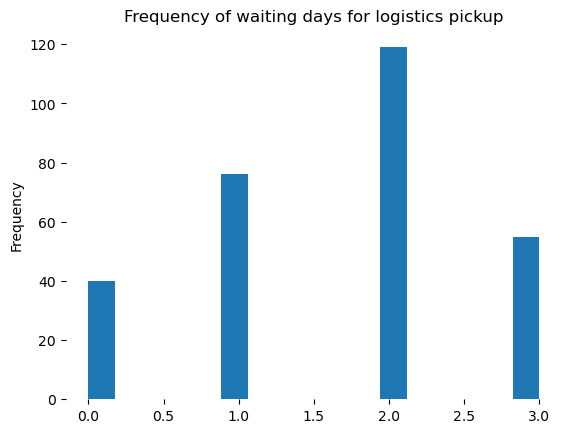

In [266]:
#histogram of frequency
data_df["pickup_days_difference"].plot(kind='hist', bins=17, title='Frequency of waiting days for logistics pickup', label='');
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

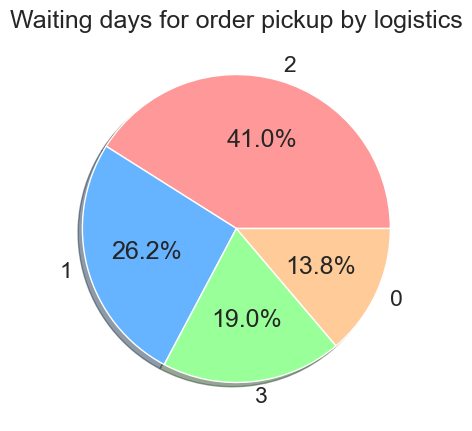

In [278]:
#plt.style.use('fast')
data_df["pickup_days_difference"].value_counts().plot.pie(title='Waiting days for order pickup by logistics', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], shadow=True, ylabel='', autopct='%1.1f%%');

Text(0.5, 0.98, 'Frequency of waiting days between warehouse and logistics')

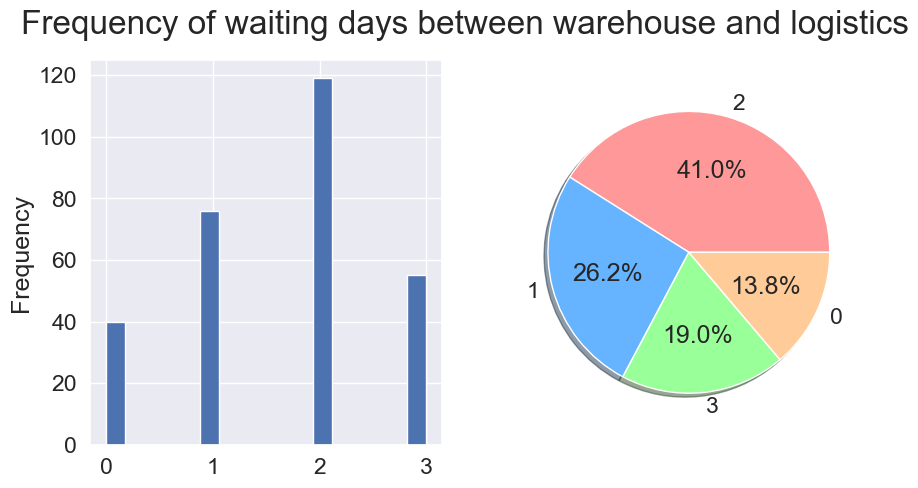

In [390]:
fig1, ax = plt.subplots(1,2, figsize=(10,5)) # 1 row, 2 columns
#pie
data_df["pickup_days_difference"].plot(kind='hist', bins=17, ax=ax[0])
#pie
ax[1]=data_df["pickup_days_difference"].value_counts().plot.pie(colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], shadow=True, ylabel='', autopct='%1.1f%%')
fig1.suptitle('Frequency of waiting days between warehouse and logistics', fontsize=24)

In [279]:
#correlation matrix
corr = data_df.corr()

corr.style.background_gradient(cmap='coolwarm')

/var/folders/kc/___rhq214md6vjt0fbth20mw0000gn/T/ipykernel_60187/3310104792.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_df.corr()


,ready_to_ship_day,pickup_day,pickup_days_difference
ready_to_ship_day,1.000000,0.083971,0.051334
pickup_day,0.083971,1.000000,-0.167962
pickup_days_difference,0.051334,-0.167962,1.000000


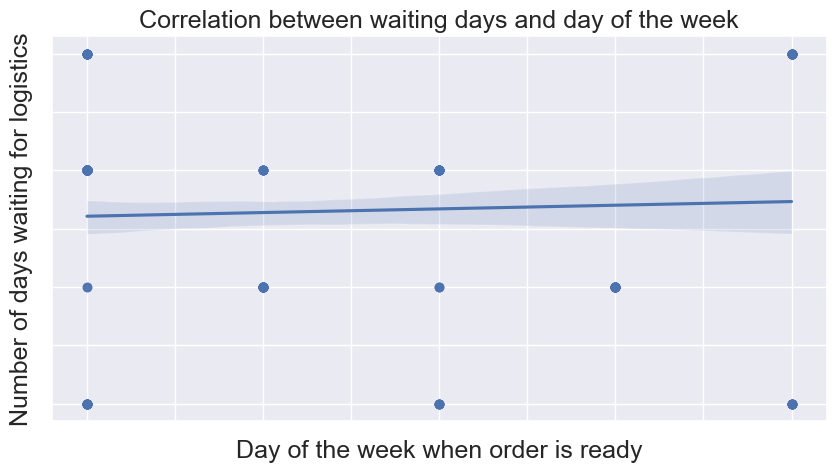

In [450]:
#scatter plot correlation

# use the function regplot to make a scatterplot
ax = sns.regplot(x=data_df["ready_to_ship_day"], y=data_df["pickup_days_difference"])
ax.set(xlabel="Day of the week when order is ready")
ax.set(ylabel="Number of days waiting for logistics")
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(title='Correlation between waiting days and day of the week')
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)

#sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Times New Roman'})


In [411]:
data_df.columns

Index(['order_id', 'ready_to_ship_date', 'pickup_date', 'ready_to_ship_day',
       'pickup_day', 'pickup_days_difference', 'day_of_week'],
      dtype='object')

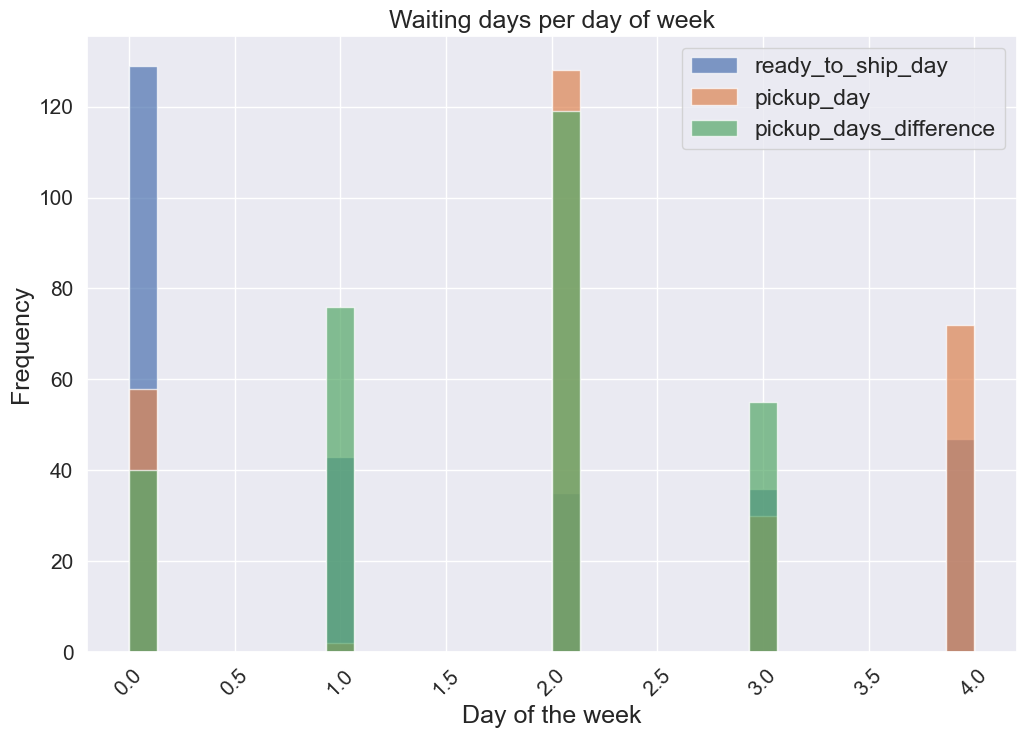

In [436]:
data_df.plot(kind='hist',
        alpha=0.7,
        bins=30,
        title='Waiting days per day of week',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15) 
       
plt.xlabel('Day of the week')
plt.ylabel("Frequency");

In [442]:
ax = sns.regplot(x=data_df["ready_to_ship_day"], y=data_df["pickup_days_difference"])
ax.set(xlabel="Day of the week when order is ready")
ax.set(ylabel="Number of days waiting for logistics")
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(title='Correlation between waiting days and week of the day')
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)

0.05133408440528509
0.05133408440528509


Text(0.5, 1.0, 'Correlation Matrix')

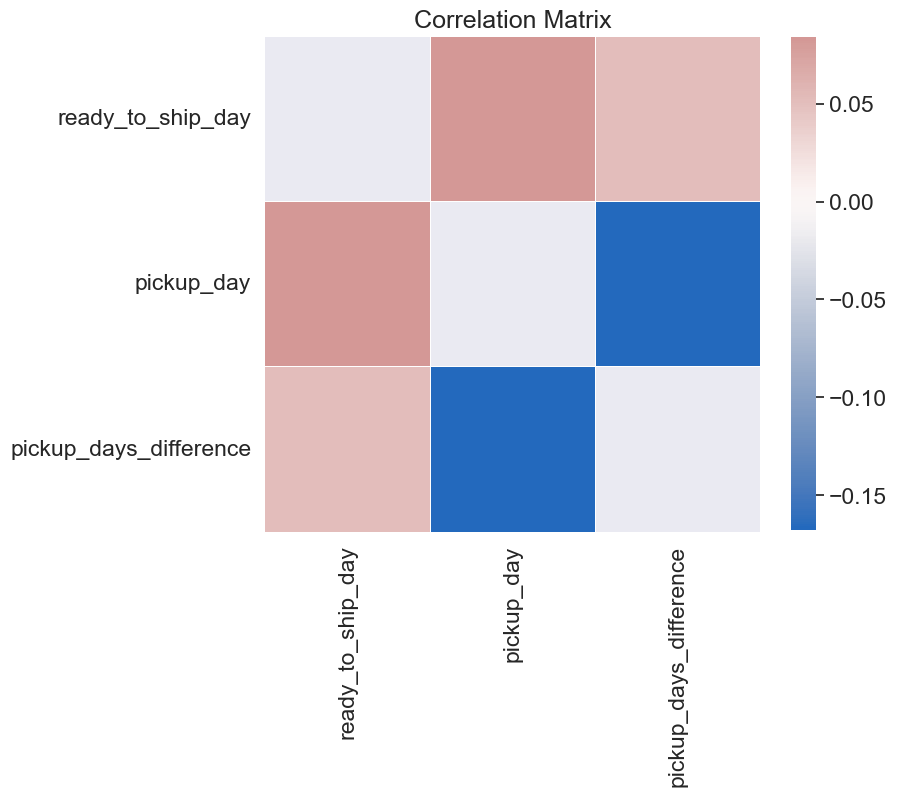

In [414]:
# Let's run a correlation matrix using the Pearson method
df_corr = df2.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75,'S',
                  np.where(np.abs(df_corr)>0.5,'M',
                           np.where(np.abs(df_corr)>0.25,'W','')))

# Plot correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});
plt.title('Correlation Matrix')

In [377]:
def get_redundant_pairs(data_df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = data_df.columns
    for i in range(0, data_df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(data_df):
    au_corr = data_df.corr().unstack()
    labels_to_drop = get_redundant_pairs(data_df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

corrplot = get_correlations(data_df[columns])

corrplot

ready_to_ship_day  pickup_day                0.083971
                   pickup_days_difference    0.051334
pickup_day         pickup_days_difference   -0.167962
dtype: float64

<AxesSubplot: >

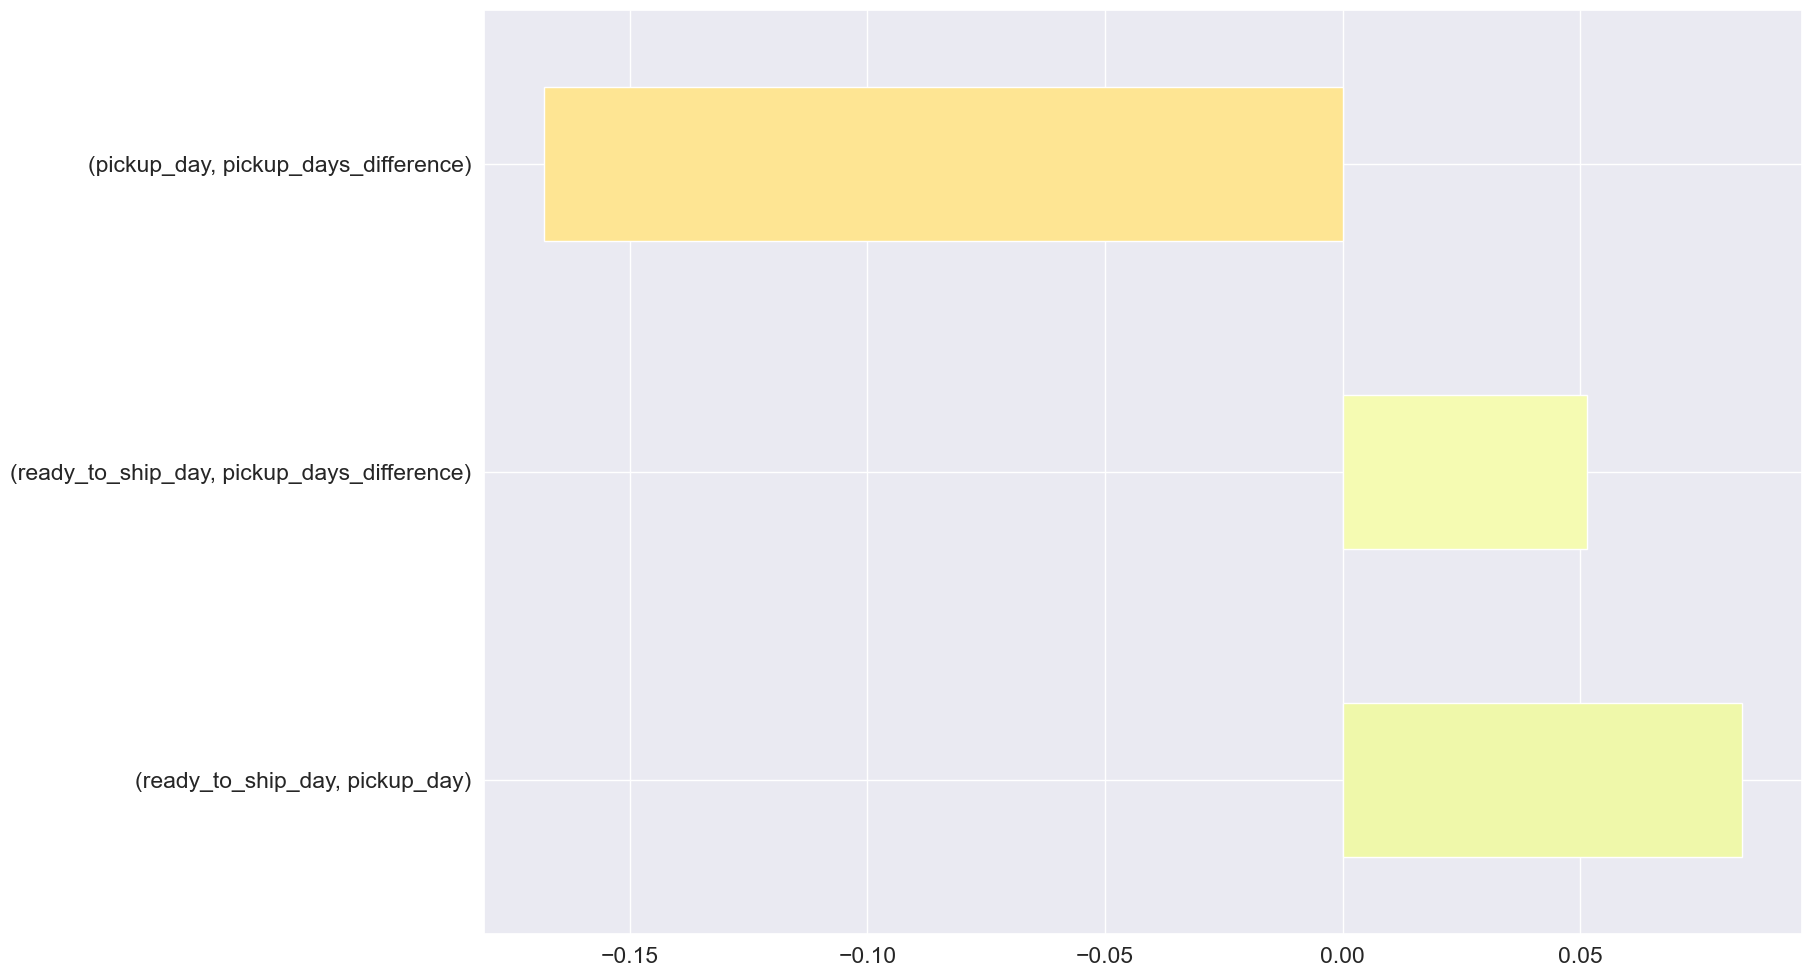

In [378]:

import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm

fig, ax = plt.subplots(figsize =(17,12))

norm = TwoSlopeNorm(vmin=-1, vcenter =0, vmax=1)
colors = [plt.cm.RdYlGn(norm(c)) for c in corrplot.values]

corrplot.plot.barh(color=colors)

# Compare waiting days to type of processing

## Import data

In [131]:
#import data
order_process_df = pd.read_csv('data/Order_process.csv')

## Clean and adapt data

In [132]:
#columns in lowercase
order_process_df.columns = order_process_df.columns.str.lower()

In [133]:
cols = order_process_df.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
order_process_df.columns = cols

In [134]:
order_process_df.head()

,row_id,order_id,order_date,on_truck_scan_date,ship_mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing


In [135]:
#only copy once a column
cols_to_use = data_df.columns.difference(order_process_df.columns)
data1_df = data_df.merge(order_process_df, on='order_id', how='outer', suffixes=('','_y'))
data1_df.drop(data1_df.filter(regex='_y$').columns, axis=1, inplace=True)


In [137]:
data1_df.columns

Index(['order_id', 'ready_to_ship_date', 'pickup_date', 'ready_to_ship_day',
       'pickup_day', 'pickup_days_difference', 'row_id', 'order_date',
       'on_truck_scan_date', 'ship_mode'],
      dtype='object')

In [483]:
#drop duplicates
data1_df.drop_duplicates(subset=['order_id'], inplace=True)

In [486]:
data1_df.dropna(inplace=True)

In [141]:
data1_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 752
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                753 non-null    object        
 1   ready_to_ship_date      753 non-null    datetime64[ns]
 2   pickup_date             753 non-null    datetime64[ns]
 3   ready_to_ship_day       753 non-null    float64       
 4   pickup_day              753 non-null    float64       
 5   pickup_days_difference  753 non-null    float64       
 6   row_id                  753 non-null    int64         
 7   order_date              753 non-null    object        
 8   on_truck_scan_date      753 non-null    object        
 9   ship_mode               753 non-null    object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 64.7+ KB


In [142]:
data1_df.drop(["row_id"], axis=1, inplace=True)

In [145]:
data1_df.head()

,order_id,ready_to_ship_date,pickup_date,ready_to_ship_day,pickup_day,pickup_days_difference,order_date,on_truck_scan_date,ship_mode
0,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2/9/2019,03/09/2019,Express
1,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2/9/2019,03/09/2019,Express
2,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2/9/2019,03/09/2019,Express
3,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2/9/2019,03/09/2019,Express
4,CA-2019-129847,2019-09-04,2019-09-04,2.0,2.0,0.0,2/9/2019,04/09/2019,Express


In [146]:
#change date format
data1_df['order_date'] = pd.to_datetime(data1_df['order_date'], format='%d/%m/%Y')
data1_df['on_truck_scan_date'] = pd.to_datetime(data1_df['on_truck_scan_date'], format='%d/%m/%Y')

In [148]:
#determine which day of week from date
data1_df["order_day"] = data1_df["order_date"].dt.dayofweek
data1_df["on_truck_scan_day"] = data1_df["on_truck_scan_date"].dt.dayofweek

In [168]:
data1_df.head()

,order_id,ready_to_ship_date,pickup_date,ready_to_ship_day,pickup_day,pickup_days_difference,order_date,on_truck_scan_date,ship_mode,order_day,on_truck_scan_day
0,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2019-09-02,2019-09-03,Express,0,1
1,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2019-09-02,2019-09-03,Express,0,1
2,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2019-09-02,2019-09-03,Express,0,1
3,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2019-09-02,2019-09-03,Express,0,1
4,CA-2019-129847,2019-09-04,2019-09-04,2.0,2.0,0.0,2019-09-02,2019-09-04,Express,0,2


In [170]:
#find out how many processing modes there are
data1_df['ship_mode'].unique()

array(['Express', 'Standard Processing'], dtype=object)

In [462]:
#the processing mode chosen by customers
data1_df["ship_mode"].value_counts()

2    602
1    151
Name: ship_mode, dtype: int64

In [463]:
data1_df.head()

,order_id,ready_to_ship_date,pickup_date,ready_to_ship_day,pickup_day,pickup_days_difference,order_date,on_truck_scan_date,ship_mode,order_day,on_truck_scan_day
0,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2019-09-02,2019-09-03,1,0,1
1,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2019-09-02,2019-09-03,1,0,1
2,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2019-09-02,2019-09-03,1,0,1
3,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2019-09-02,2019-09-03,1,0,1
4,CA-2019-129847,2019-09-04,2019-09-04,2.0,2.0,0.0,2019-09-02,2019-09-04,1,0,2


## EDA

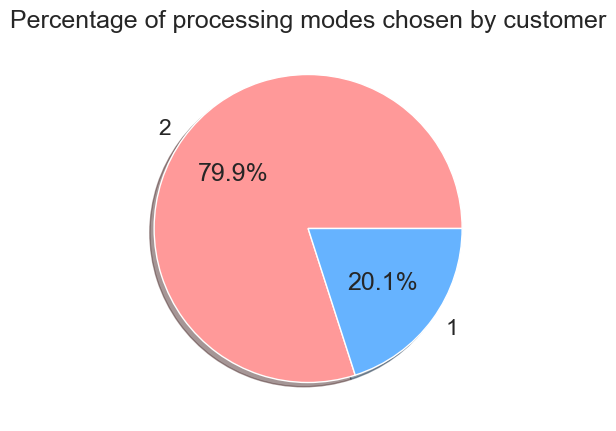

In [461]:
#plot the ship mode per customer
data1_df["ship_mode"].value_counts().plot(kind="pie", colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], shadow=True, ylabel='', autopct='%1.1f%%', title="Percentage of processing modes chosen by customer");

In [457]:
#mapping = {"Express": 1, "Standard Processing": 2}
#data1_df.replace({"Express" : mapping, "Standard Processing" : mapping})

In [458]:
#change ship mode from string to integer
data1_df.replace(to_replace=['Express', 'Standard Processing'], value=[1, 2], inplace=True)

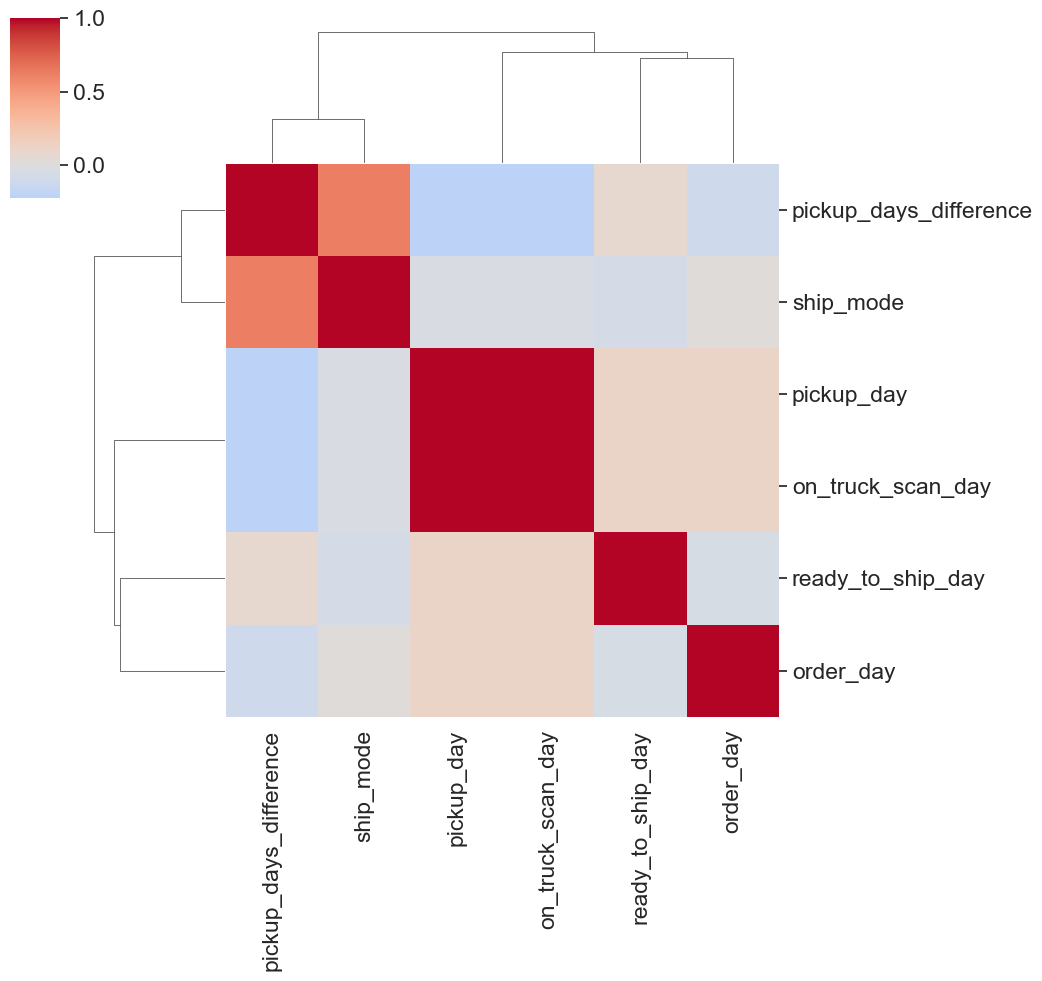

In [464]:
corrs = data1_df.drop(columns='order_id').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

In [466]:
correlation = data1_df["pickup_days_difference"].corr(data1_df["ship_mode"])

correlation 

0.7213175665279647

<AxesSubplot: xlabel='ship_mode', ylabel='pickup_days_difference'>

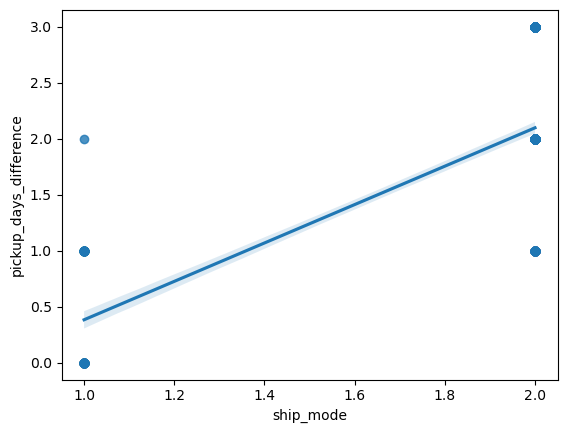

In [229]:
sns.regplot(x=data1_df["ship_mode"], y=data1_df["pickup_days_difference"])

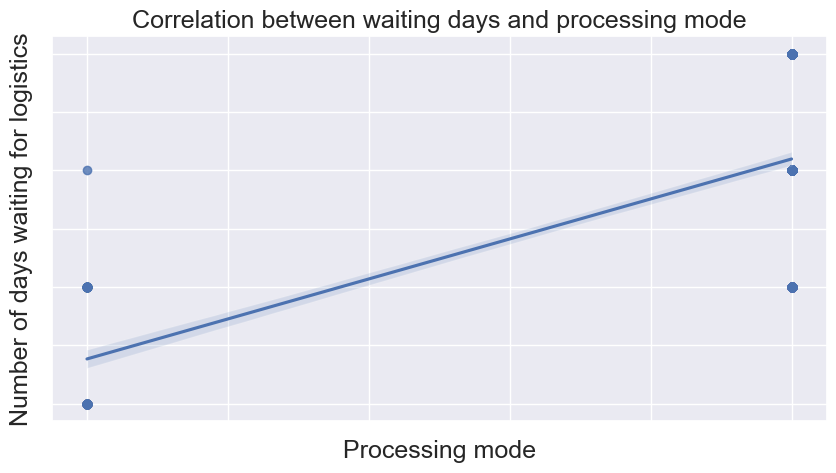

In [471]:
# use the function regplot to make a scatterplot
ax = sns.regplot(x=data1_df["ship_mode"], y=data1_df["pickup_days_difference"])
ax.set(xlabel="Processing mode")
ax.set(ylabel="Number of days waiting for logistics")
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(title='Correlation between waiting days and processing mode')
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)

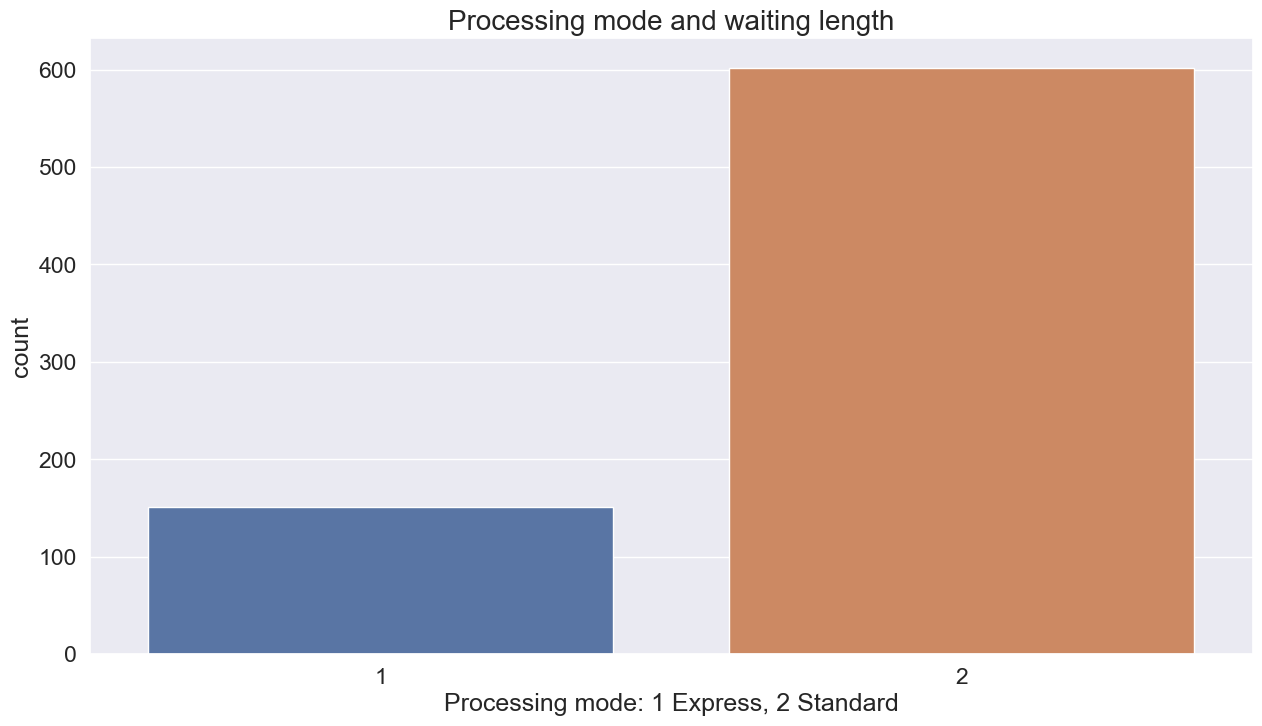

In [482]:
# Plot waiting days per ship mode
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=data1_df['ship_mode']) # create countplot
f1.tick_params(axis='x', rotation=360) # get x-ticks and rotate them
f1.set(xlabel="Processing mode: 1 Express, 2 Standard") # set no label for x-axis 
#f1.set_ylabel("pickup_days_difference", fontsize = 10); # set label for y-axis
f1.set_title('Processing mode and waiting length', fontsize=20); # set title

/var/folders/kc/___rhq214md6vjt0fbth20mw0000gn/T/ipykernel_60187/3231131312.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1_df.groupby("ship_mode").mean()["pickup_days_difference"].plot(kind='bar', x="ship_mode", y= "pickup_days_difference", rot=360, label='')


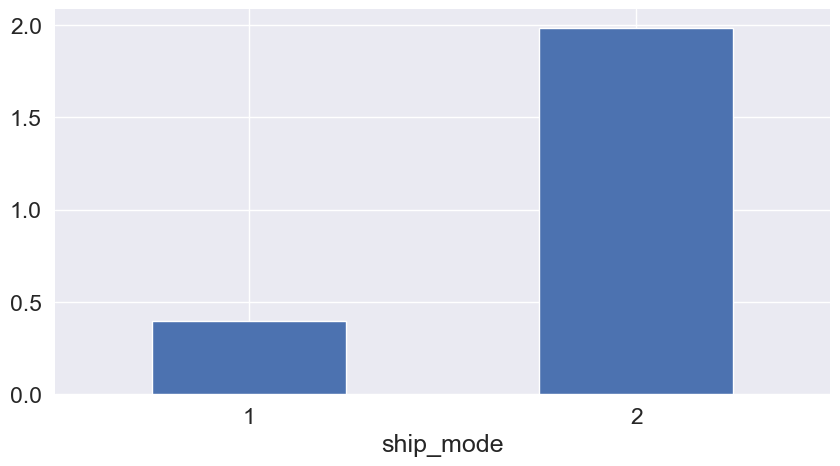

In [500]:
data1_df.groupby("ship_mode").mean()["pickup_days_difference"].plot(kind='bar', x="ship_mode", y= "pickup_days_difference", rot=360, label='')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

In [489]:
data1_df.head()

,order_id,ready_to_ship_date,pickup_date,ready_to_ship_day,pickup_day,pickup_days_difference,order_date,on_truck_scan_date,ship_mode,order_day,on_truck_scan_day
0,CA-2019-116540,2019-09-02,2019-09-03,0.0,1.0,1.0,2019-09-02,2019-09-03,1,0,1
4,CA-2019-129847,2019-09-04,2019-09-04,2.0,2.0,0.0,2019-09-02,2019-09-04,1,0,2
5,CA-2019-129630,2019-09-04,2019-09-04,2.0,2.0,0.0,2019-09-04,2019-09-04,1,2,2
7,CA-2019-106278,2019-09-05,2019-09-06,3.0,4.0,1.0,2019-09-02,2019-09-06,2,0,4
11,CA-2019-158099,2019-09-05,2019-09-06,3.0,4.0,1.0,2019-09-03,2019-09-06,1,1,4


In [493]:
data1_df.groupby('pickup_day')['order_day'].mean()

pickup_day
0.0    2.350000
1.0    0.000000
2.0    2.032258
3.0    2.352941
4.0    2.320755
Name: order_day, dtype: float64